# Описание задания 

1. Используя подходящую функцию (датчик псевдослучайных чисел, 
распределенных по указанному в Таблице закону; параметры распределения  
указанны там же),  получить выборки объема V1,  V2  и V3. Для каждой 
выборки вычислить выборочную оценку среднего, смещенную и 
несмещенную выборочные оценки дисперсии; сравнить оценки с 
теоретическими (истинными) значениями мат.ожидания и дисперсии 
моделируемой с.в.   Для выборки объема V3 подобрать наилучшую 
группировку и построить гистограмму.
2. Методом суммирования получить выборки объема V1 /k, V2 /k и V3 /k 
(k=12) из нормального распределения с указанными параметрами. 
3. Для каждой выборки, полученной в п.2, вычислить выборочные 
оценки среднего, дисперсии, коэффициента асимметрии и эксцесса. 
Сравнить полученные оценки с теоретическими значениями. 
4. Для каждой выборки из п. 2 вывести в одном графическом окне 
эмпирическую функцию распределения и теоретическую функцию 
распределения. Подобрать для каждой выборки наилучшую группировку и 
построить в одном графическом окне нормированную гистограмму и 
плотность распределения вероятностей.
5. Повторить  многократно (~ 100 ) процесс моделирования выборки из 
нормального распределения объема V1 /k  и получить усредненные значения 
выборочных оценок (см. п.3). 


In [1]:
# Вариант 21

# V1 = 420
# V2 = 600 
# V3 = 1500

# Гамма-распределение a = 3, b = 0.25 - гамма распределение 
# sigma = 1 
# mu = 2.2 - норм распределение 

import random as rd
from collections import Counter
import pandas as pd
import statistics as st 
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF
from scipy. stats import norm

In [164]:
a = 3
b = 0.25

# Задание 1 

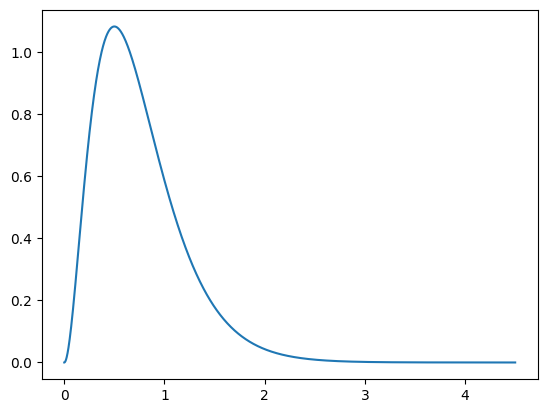

0.7526316108976865
0.7490317355045935
0.7592295780490341
0.7462299937005545
Истинное значение мат.ожидания
0.75


In [177]:

# 1: получили 3 выборки, объемом V1,V2,V3
V1 = 420
V2 = 600
V3 = 1500 
V4 = 6000

def gamma_destribution(range_):
    x = np.linspace(0,4.5,range_)
    y = scipy.stats.gamma.pdf(x, a=3, scale=0.25)
    plt.plot(x, y)
    return plt.show()

gamm_destr_3 = gamma_destribution(V3)

# Гамма-распредление для 3-х выборок
def gammvariate(a, b, V):
    list_gamm = []
    for i in range(V):
        list_gamm.append(rd.gammavariate(a, b))
    return list_gamm

destr_1 = gammvariate(3, 0.25, V1)
destr_2 = gammvariate(3, 0.25, V2)
destr_3 = gammvariate(3, 0.25, V3)
destr_4 = gammvariate(3, 0.25, V4)

# 2: функции всех параметров 

# Мат.ожидание
def mean(value_):
    return sum(value_)/ len(value_)

# Медиана
def median(value_):
    n = len(value_)
    mid = n // 2
    if n % 2 == 1:
        return sorted(value_)[mid]
    else:
        return mean(sorted(value_)[mid-1:][:2]) 

# Дисперсия
def variance(xs):
    mu = mean(xs)
    n = len(xs)
    n = n-1 if n in range(1, 30) else n  
    square_deviation = lambda x : (x - mu) ** 2 
    return sum( map(square_deviation, xs) ) / n

# стандартное отклонение
def standart_deviation(value_):
    return st.sqrt(variance(value_))

# 3: Определим параметры смещенные и несмещенные

# Выборочная оценка среднего
print(st.mean(destr_1))
print(st.mean(destr_2))
print(st.mean(destr_3))
print(st.mean(destr_4))
print('Истинное значение мат.ожидания')
print(a*b)




In [178]:
print('Для destr_1, несмещённая и смещённая оценка дисперсии')
print(st.pvariance(destr_1)) # Несмещённая оценка дисперсии
print(st.variance(destr_1)) # Смещённая оценка дисперсии

Для destr_1, несмещённая и смещённая оценка дисперсии
0.18241420060907898
0.18284955669645148


In [179]:
print(np.var(destr_1)) #H
print(st.variance(destr_1)) #С
print('Для V1')
print(np.var(destr_2))
print(st.variance(destr_2))
print('Для V2')
print(np.var(destr_3))
print(st.variance(destr_3))
print('Для V3')
print(np.var(destr_4))
print(st.variance(destr_4))
print('Для V4')

print('Истинное значение дисперсии')
print(a*(b**2))
# Мы видим какое у нас получилось отклонение между смещенной и несмещенной оценкой дисперсии в зависимости от объема выборки.
# Можем сравнить их с истинным значением дисперсии
# Чем больше объем выборки, тем меньше отклонение
# Для выборки объема V2 получились максимально приближенные значения к истинному

0.18241420060907895
0.18284955669645148
Для V1
0.19328995896853582
0.19361264671305758
Для V2
0.2000747050091161
0.20020817712720088
Для V3
0.18874758696007604
0.18877905013509858
Для V4
Истинное значение дисперсии
0.1875


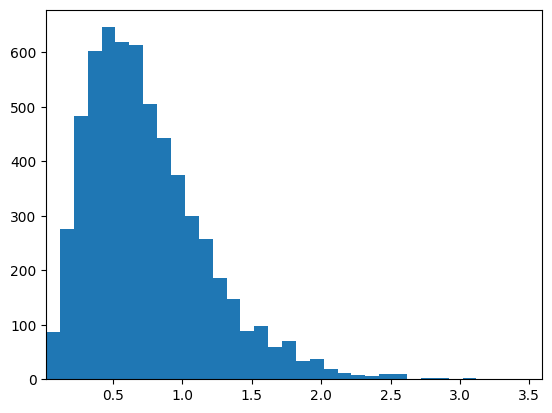

In [189]:
plt.hist(destr_4, bins = np.arange(min(destr_4), max(destr_4) + 1, 0.1))
plt.xlim(min(destr_4), max(destr_4))
plt.show()

In [210]:
print(2/(3**(1/2))) # Коэфф. ассиметрии

1.1547005383792517


In [211]:
print(6/3) # Эксцесс

2.0


# Задание 2

In [199]:

# Методом суммирования получить выборки объема V1 /k, V2 /k и V3 /k (k=12) из нормального распределения с указанными 
# параметрами. 
k = 12 
m = 2.2 
s = 1

def graph_of_norm(v, k, m, s):
    list_of_Xi = []
    index = 0
    sum_ = 0
    for i in v:
        sum_ += i
        index += 1
        if index == k:
            list_of_Xi.append(sum_)
            index = 0
            sum_ = 0
            
    list_for_graph = []
    for xi in list_of_Xi:
        xi_new = (xi - k * (a*b))/((k * (a*(b**2)))**(1/2))
        list_for_graph.append(xi_new)

    list_for_graph_1 = []
    for x in list_for_graph:
        x_new = x * s + m
        list_for_graph_1.append(x_new)
    return list_for_graph_1

# Выводим функцию и методом суммирования получаем нужные нам выборки

destr_1_new = graph_of_norm(destr_1, k, m, s)
destr_2_new = graph_of_norm(destr_2, k, m, s)
destr_3_new = graph_of_norm(destr_3, k, m, s)
destr_4_new = graph_of_norm(destr_4, k, m, s)

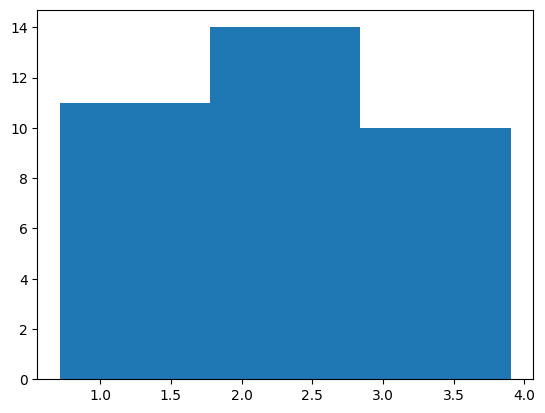

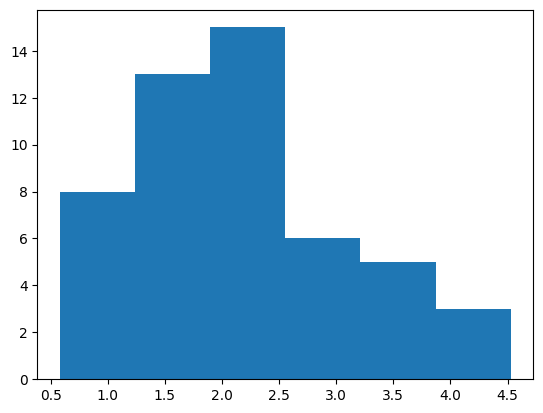

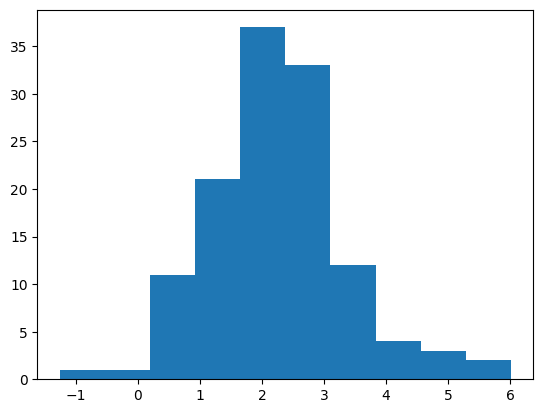

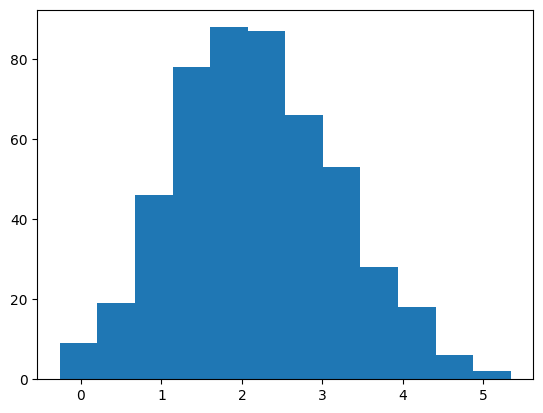

In [269]:
plt.hist(destr_1_new, bins = 3)
plt.show(),
plt.hist(destr_2_new, bins = 6)
plt.show()
plt.hist(destr_3_new, bins = 10)
plt.show(),
plt.hist(destr_4_new, bins = 12)
plt.show()

# Задание 3

#выборочные оценки среднего, дисперсии, коэффициента асимметрии и эксцесса

In [206]:
# мат ожидания
print(st.mean(destr_1_new))
print(st.mean(destr_2_new))
print(st.mean(destr_3_new))
print(st.mean(destr_4_new))
print('Истинное значение мат.ожидания')
print(m)

2.2210528871814916
2.1922538840367483
2.273836624392273
2.1698399496044365
Истинное значение мат.ожидания
2.2


In [207]:
# дисперсии 
print(np.var(destr_1_new))
print(np.var(destr_2_new))
print(np.var(destr_3_new))
print(np.var(destr_4_new))

print('Истинное значение дисперсии')
print(s**2)

0.746428862334224
0.8412618233647058
1.2183525153894204
1.0202078190834716
Истинное значение дисперсии
1


In [273]:
# Коэфф. ассиметрии
print(pd.Series(destr_1_new).skew())
print(pd.Series(destr_2_new).skew())
print(pd.Series(destr_3_new).skew())
print(pd.Series(destr_4_new).skew())
# У нормального распределения 0

0.19813547609660384
0.7127333666528257
0.37878339071422695
0.2287704121933192


In [272]:
#эксцесс
print(pd.Series(destr_1_new).kurt())
print(pd.Series(destr_2_new).kurt())
print(pd.Series(destr_3_new).kurt())
print(pd.Series(destr_4_new).kurt())
# У нормального распределения 0

-0.9389613733193731
0.25853128535436554
1.4019618629709822
-0.27250399115241164


# Задание 4 

In [237]:
# Для каждой выборки из п. 2 вывести в одном графическом окне 
# эмпирическую функцию распределения и теоретическую функцию 
# распределения. Подобрать для каждой выборки наилучшую группировку и 
# построить в одном графическом окне нормированную гистограмму и 
# плотность распределения вероятностей.

def graph_1_for_task_4(v):
    norm_rv = sts.norm(2.2, 1)
    sample = norm_rv.rvs(len(v))
    x = np.linspace(0,4,100000)
    cdf = norm_rv.cdf(x)
    plt.plot(x, cdf, label='theoretical CDF')

    ecdf = ECDF(v)
    plt.step(ecdf.x, ecdf.y, label='ECDF')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='upper left')
    return plt.step, plt.plot

# Функция, которая объединяет два графика на одном рисунке

(<function matplotlib.pyplot.step(x, y, *args, where='pre', data=None, **kwargs)>,
 <function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>)

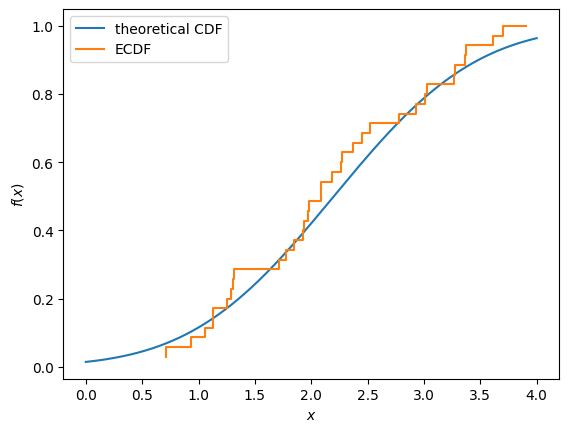

In [238]:
graph_1_for_task_4(destr_1_new)

(<function matplotlib.pyplot.step(x, y, *args, where='pre', data=None, **kwargs)>,
 <function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>)

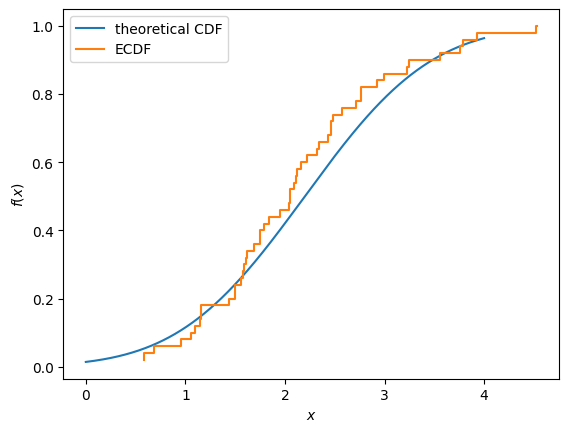

In [239]:
graph_1_for_task_4(destr_2_new)

(<function matplotlib.pyplot.step(x, y, *args, where='pre', data=None, **kwargs)>,
 <function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>)

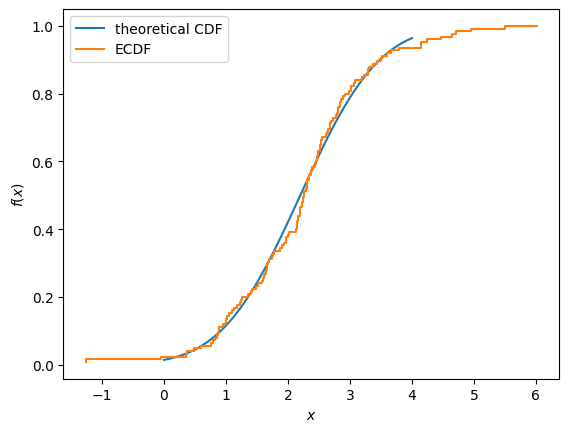

In [240]:
graph_1_for_task_4(destr_3_new)

(<function matplotlib.pyplot.step(x, y, *args, where='pre', data=None, **kwargs)>,
 <function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>)

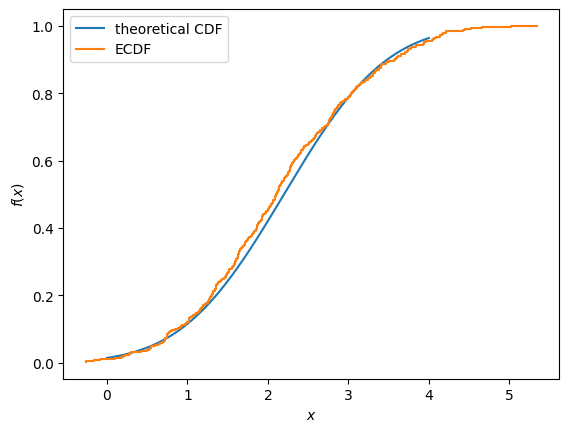

In [244]:
graph_1_for_task_4(destr_4_new)

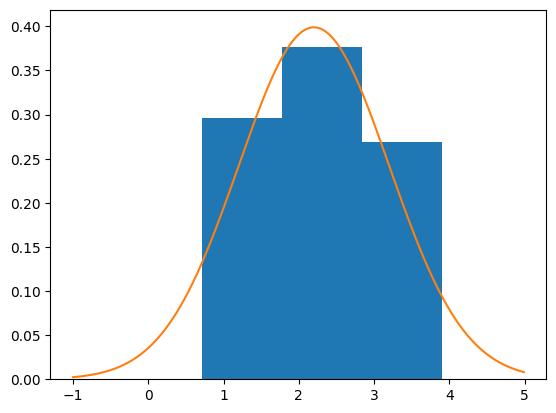

In [264]:
x = x = np.arange (-1, 5, 0.01)
plt.hist(destr_1_new, bins = 3, density=True)
plt.plot (x, norm.pdf (x, m, s))
# V1/k нормированная гистограмма и плотность распредления вероятностей

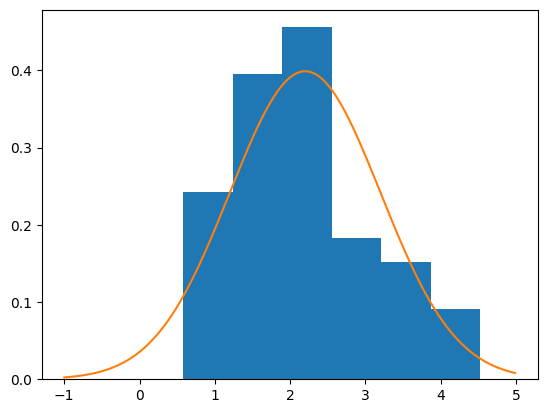

In [274]:
plt.hist(destr_2_new, bins = 6, density=True)
plt.plot (x, norm. pdf (x, m, s))
# V2/k нормированная гистограмма и плотность распредления вероятностей

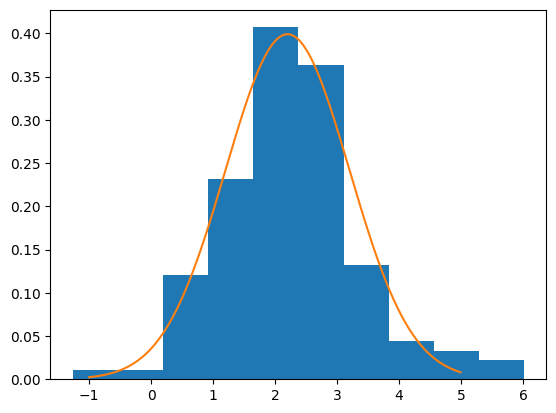

In [266]:
plt.hist(destr_3_new, bins = 10, density=True)
plt.plot (x, norm. pdf (x, m, s))
# V3/k нормированная гистограмма и плотность распредления вероятностей

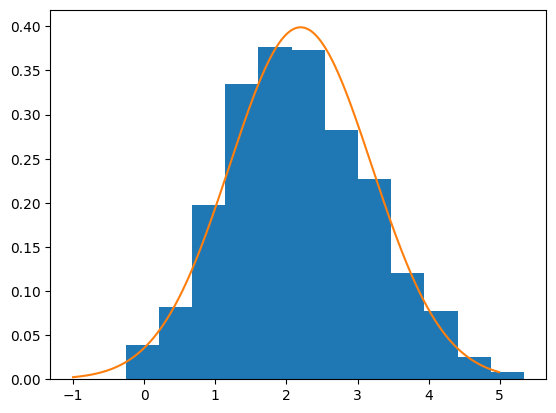

In [267]:
plt.hist(destr_4_new, bins = 12, density=True)
plt.plot (x, norm. pdf (x, m, s))
# V4/k нормированная гистограмма и плотность распредления вероятностей

# Задание 5

In [271]:
# Повторить  многократно (~ 100 ) процесс моделирования выборки из 
# нормального распределения объема V1 /k  и получить усредненные 
# значения выборочных оценок (см. п.3)

mean = 0
var = 0
skew = 0
kurt = 0

for i in range(1000):
    V_1_1 = []
    for _ in range(V1):
         V_1_1.append(rd.gammavariate(3, 0.25))
    o = graph_of_norm(V_1_1, k, m, s)
    mean += (st.mean(o))
    var += (np.var(o))
    skew += (pd.Series(o).skew())
    kurt += (pd.Series(o).kurt())
print(f'Усреднённое значение среднего {mean/1000}')
print(f'Усреднённое значение сигмы {(var/1000)**(1/2)}')
print(f'Усреднённое значение асимметрии {skew/1000}')
print(f'Усреднённое значение эксцесса {kurt/1000}')

Усреднённое значение среднего 2.207422624011524
Усреднённое значение сигмы 0.9917845838049829
Усреднённое значение асимметрии 0.3084532586361037
Усреднённое значение эксцесса 0.11331086019477254
